In [1]:
from ld_class import *

subject = "fsaverage"
atlas_xml_path = "AAL2/atlas/AAL2.xml"
atlas_nii_path = "AAL2/atlas/AAL2.nii"

In [2]:
obj = LeadfieldGenerator(subject)

In [3]:
raw, atlas_nii_objcet, atlas_xml_object = obj.load_data(atlas_nii_path, atlas_xml_path)

0 files missing from root.txt in /Users/orabe/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /Users/orabe/mne_data/MNE-fsaverage-data/fsaverage
Extracting EDF parameters from /Users/orabe/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [4]:
conductivity = (0.3, 0.006, 0.3)  # default for three layers
bem = obj.build_BEM(conductivity=conductivity)

Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
outer skin  CM is  -0.21 -19.38  -0.23 mm
outer skull CM is  -0.19 -19.34  -0.49 mm
inner skull CM is  -0.53 -21.10   6.21 mm
Checking that surface outer skull is inside surface outer skin  ...
Checking that surface inner skull is inside surface outer skull ...
Checking distance between outer skin  and outer skull surfaces...
Minimum distance between the outer skin  and outer skull surfaces is approximately    1.6 mm
Checking distance between outer skull and inner skull surfaces...
Minimum distance between the outer skull and inner skull surfaces is approximately    5.4 mm
Surfaces passed the basic topology checks.
Complete.

Three-layer model surfaces loaded.
Computing the linear collocation solution...
    Matrix coefficients...
     

Using surface: /Users/orabe/mne_data/MNE-fsaverage-data/fsaverage/bem/inner_skull.surf
Using surface: /Users/orabe/mne_data/MNE-fsaverage-data/fsaverage/bem/outer_skull.surf
Using surface: /Users/orabe/mne_data/MNE-fsaverage-data/fsaverage/bem/outer_skin.surf


/Users/orabe/miniconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


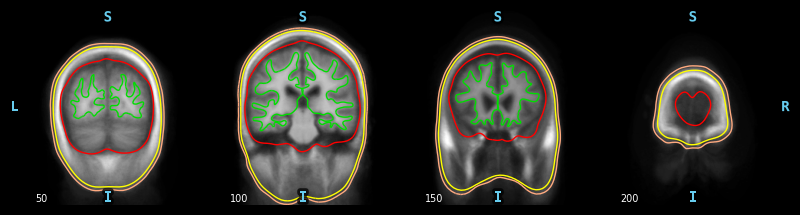

In [5]:
plot_bem_kwargs = dict(
    subject=obj.subject,
    subjects_dir=obj.subjects_dir,
    brain_surfaces="white",
    orientation="coronal",
    slices=[50, 100, 150, 200],
)
mne.viz.plot_bem(**plot_bem_kwargs)
plt.show()

Using surface: /Users/orabe/mne_data/MNE-fsaverage-data/fsaverage/bem/inner_skull.surf
Using surface: /Users/orabe/mne_data/MNE-fsaverage-data/fsaverage/bem/outer_skull.surf
Using surface: /Users/orabe/mne_data/MNE-fsaverage-data/fsaverage/bem/outer_skin.surf
    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read


/Users/orabe/miniconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


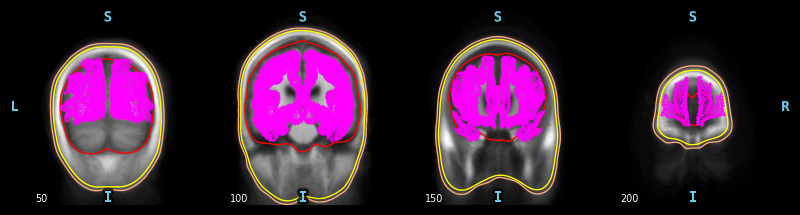

In [6]:
src = os.path.join(obj.fs_dir, "bem", "fsaverage-ico-5-src.fif")
mne.viz.plot_bem(src=src, **plot_bem_kwargs)
plt.show()


In [7]:
old = raw.copy().ch_names


In [8]:
obj.clean_eeg_channels(raw)


In [9]:
new = raw.copy().ch_names


In [10]:
new == old


False

In [11]:
obj.plot_EEG_montage(raw, src)


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Reading /Users/orabe/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-ico-5-src.fif...
Using pyvistaqt 3d backend.

Using outer_skin.surf for head surface.
Channel types::	eeg: 64
Projecting sensors to the head surface


In [12]:
leadfield_downsampled, fwd, unique_labels = obj.compute_leadfield(
    raw,
    src,
    bem,
    atlas_nii_objcet,
    atlas_xml_object,
    atlas="aal2_cortical",
    cortex_parts="full_cortex",
    path_to_save=os.getcwd(),
)


Source space          : /Users/orabe/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-ico-5-src.fif
MRI -> head transform : /Users/orabe/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-trans.fif
Measurement data      : instance of Info
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Reading /Users/orabe/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-ico-5-src.fif...
Read 2 source spaces a total of 20484 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999994  0.003552  0.000202      -1.76 mm
    -0.003558  0.998389  0.056626      31.09 mm
    -0.000001 -0.056626  0.998395      39.60 mm
     0.000000  0.000000  0.000000       1.00

Read  64 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Employing the head->MRI coordinate transform with the BEM model.
BEM model instance of ConductorModel is n

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found     0/ 7809 points outside using solid angles
    Total 10242/10242 points inside the surface
Interior check completed in 1861.9 ms
Checking surface interior status for 10242 points...
    Found  2241/10242 points inside  an interior sphere of radius   47.7 mm
    Found     0/10242 points outside an exterior sphere of radius   98.3 mm
    Found     0/ 8001 points outside using surface Qhull


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found     0/ 8001 points outside using solid angles
    Total 10242/10242 points inside the surface
Interior check completed in 2090.5 ms

Setting up for EEG...
Computing EEG at 20484 source locations (free orientations)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Finished.
<Forward | MEG channels: 0 | EEG channels: 64 | Source space: Surface with 20484 vertices | Source orientation: Free>
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Changing to fixed-orientation forward solution with surface-based source orientations...
    [done]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished


regions number: 120
(20484,)
Leadfield size : 64 sensors x 94 dipoles
[[ 46.0499115   -8.10420132  51.77446747 ... -19.40752983   5.79743481
  -12.36075878]
 [ 63.07762527  -3.93809676  81.55725861 ... -22.51317406  -9.20882893
  -24.8643074 ]
 [ 45.6163559    4.58903217  83.16188049 ... -24.48542213 -23.28250504
  -35.49036407]
 ...
 [-17.10632133 -12.98373508 -18.83823586 ...   5.4743166   40.55622864
   28.58356667]
 [-17.82714844 -12.14234829 -22.45002937 ...  17.09500694  29.23259544
   25.3624897 ]
 [-18.07602882 -14.23802567 -20.28145409 ...  16.4323597   59.21129608
   64.51577759]]
The leadfiled matrix is saved as a binary file in NumPy .npy format at /Users/orabe/1.Master-CS/SoSe-23/NI_Project/notebooks


In [14]:
obj.check_atlas_missing_regions(atlas_xml_object, unique_labels)

total region number: 120
missed region labels: [7021 7022 9001 9002 9011 9012 9021 9022 9031 9041 9051 9052 9061 9062
 9071 9072 9081 9082 9100 9110 9120 9130 9140 9150 9160 9170]
missed region names: ['Pallidum_L', 'Pallidum_R', 'Cerebelum_Crus1_L', 'Cerebelum_Crus1_R', 'Cerebelum_Crus2_L', 'Cerebelum_Crus2_R', 'Cerebelum_3_L', 'Cerebelum_3_R', 'Cerebelum_4_5_L', 'Cerebelum_6_L', 'Cerebelum_7b_L', 'Cerebelum_7b_R', 'Cerebelum_8_L', 'Cerebelum_8_R', 'Cerebelum_9_L', 'Cerebelum_9_R', 'Cerebelum_10_L', 'Cerebelum_10_R', 'Vermis_1_2', 'Vermis_3', 'Vermis_4_5', 'Vermis_6', 'Vermis_7', 'Vermis_8', 'Vermis_9', 'Vermis_10']
missed region index: [ 79  80  95  96  97  98  99 100 101 103 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120]
